In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 2 ##
Escherichia coli is a rod-like species of bacteria that propels itself through solution using a
flagella. By rotating this flagella it can swim distances of 10 − 20 times its body size per second. Some strains act symbiotically with humans, residing in our gastrointestinal (GI) tract, while others can cause severe illness and sometimes death. Assume for this problem that a bacterium at the origin has somehow lost its flagella and has adopted a spherical shape with a radius of 0.6 μm. Ignore any flow that occurs naturally in your digestive system.

### b) ###
Make a linear plot and a log-log plot of its predicted root mean square displacement vs time.

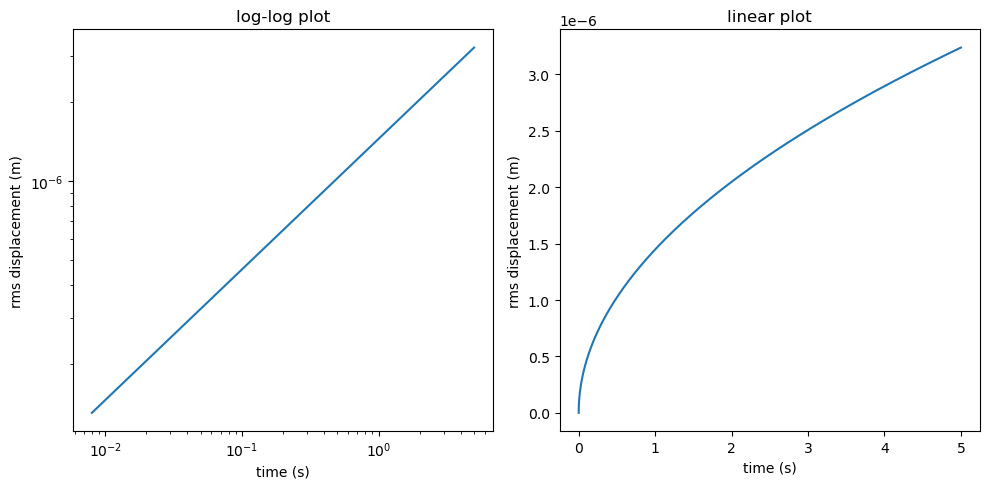

In [26]:
def rmsd(D, t):
    return 2 * np.sqrt(D * t)

t_lin = np.linspace(0, 5, 10000)
t_log = np.logspace(-3, 1, 10000, base=5)
D = 5.24E-13

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))
ax[0].plot(t_log, rmsd(D, t_log), label='rms displacement over time')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('rms displacement (m)')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title('log-log plot')

ax[1].plot(t_lin, rmsd(D, t_lin), label='rms displacement over time')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rms displacement (m)')
ax[1].set_title('linear plot')
plt.show()

## Problem 4 ##
In this problem you will simulate a variation of the standard random walk pattern in Python and compare the result of the simulation to the prediction given by the central limit theorem.

Let the random variables x(t) and y(t) undergo random walks according to the following rules:
$$x(t + 1) = x(t): \text{probability}= p_1^x$$
$$x(t + 1) = x(t) -2: \text{probability}= p_2^x$$
$$x(t + 1) = x(t) +1: \text{probability}= p_3^x$$
$$y(t + 1) = y(t) + 3: \text{probability}= p_1^y$$
$$y(t + 1) = y(t) - 1: \text{probability}= p_2^y$$

### a) ###

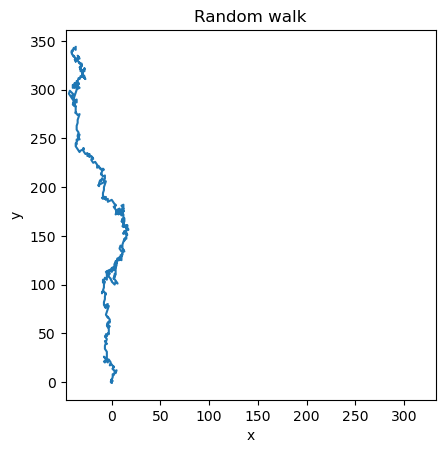

In [30]:
x = 0
y = 0

p_1x = 0.35
p_2x = 0.25
p_3x = 0.4

p_1y = 0.4
p_2y = 0.6

n = 500

x_arr = np.array([])
y_arr = np.array([])

for i in range(n):
    x_rand = np.random.rand()
    y_rand = np.random.rand()

    if x_rand <= p_1x:
        x = 0
    elif x_rand <= p_1x + p_2x:
        x = -2
    else:
        x = 1

    if y_rand <= p_1y:
        y = 3
    else:
        y = -1

    x_arr = np.append(x_arr, x)
    y_arr = np.append(y_arr, y)

x_walk = np.cumsum(x_arr)
y_walk = np.cumsum(y_arr)

plt.plot(x_walk, y_walk)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random walk') 
plt.axis('square')
plt.show()

### b) ###

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


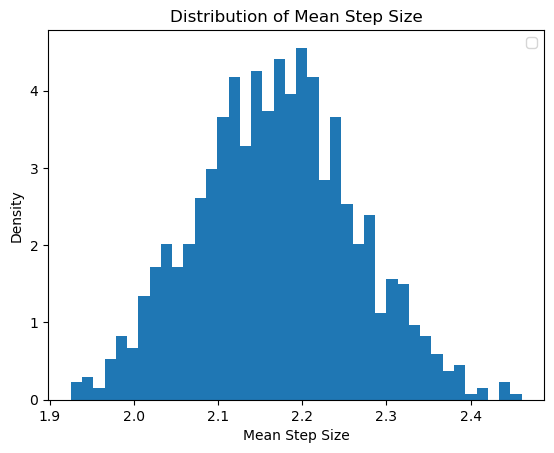

Mean: 2.169018215847859 Variance: 0.008758708488257534


In [28]:
p_1x = 0.35
p_2x = 0.25
p_3x = 0.4

p_1y = 0.4
p_2y = 0.6

n_simulations = 1000
steps_per_walk = 100

s_space = np.linspace(1.5, 2.8, 1000)

mds_arr = np.array([])

for _ in range(n_simulations):
    ds_arr = np.array([])
    for _ in range(steps_per_walk):
        # Generate Δx
        x_rand = np.random.rand()
        if x_rand <= p_1x:
            dx = 0
        elif x_rand <= p_1x + p_2x:
            dx = -2
        else:
            dx = 1
        
        y_rand = np.random.rand()
        if y_rand <= p_1y:
            dy = 3
        else:
            dy = -1
        
        ds = np.sqrt(dx**2 + dy**2)
        ds_arr = np.append(ds_arr, ds)
    
    mds_arr = np.append(mds_arr, np.mean(ds_arr))

plt.hist(mds_arr, bins=40, density=True)
plt.xlabel('Mean Step Size')
plt.ylabel('Density')
plt.title('Distribution of Mean Step Size')
plt.legend()
plt.show()

print('Mean:', np.mean(mds_arr), 'Variance:', np.var(mds_arr))

### c) ###

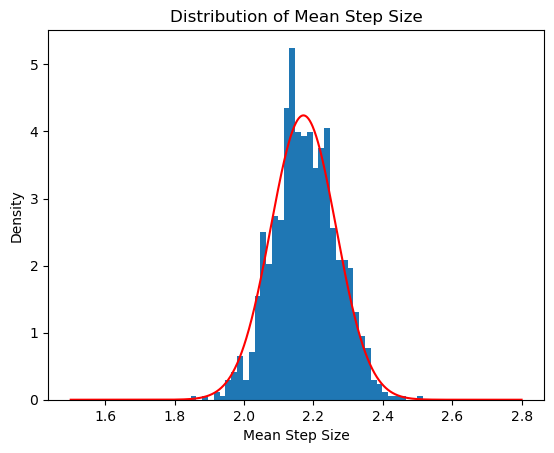

In [29]:
p_1x = 0.35
p_2x = 0.25
p_3x = 0.4

p_1y = 0.4
p_2y = 0.6

n_simulations = 1000
steps_per_walk = 100

mu_s = 2.171
var_s = 0.8853
sigma_mean = np.sqrt(var_s / steps_per_walk)

def density(s):
    return 1 / (sigma_mean * np.sqrt(2 * np.pi)) * np.exp(-(s - mu_s)**2 / (2 * sigma_mean**2))

s_space = np.linspace(1.5, 2.8, 1000)

mds_arr = np.array([])

for _ in range(n_simulations):
    ds_arr = np.array([])
    for _ in range(steps_per_walk):
        # Generate Δx
        x_rand = np.random.rand()
        if x_rand <= p_1x:
            dx = 0
        elif x_rand <= p_1x + p_2x:
            dx = -2
        else:
            dx = 1
        
        y_rand = np.random.rand()
        if y_rand <= p_1y:
            dy = 3
        else:
            dy = -1
        
        ds = np.sqrt(dx**2 + dy**2)
        ds_arr = np.append(ds_arr, ds)
    
    mds_arr = np.append(mds_arr, np.mean(ds_arr))

plt.hist(mds_arr, bins=40, density=True, label='Simulation')
plt.plot(s_space, density(s_space), 'r', label='Theory')
plt.xlabel('Mean Step Size')
plt.ylabel('Density')
plt.title('Distribution of Mean Step Size')
plt.show()